In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [103]:
nemo_images=[]
pooh_images=[]
nemo_images.append(cv2.imread("Nemo.JPG",0));
nemo_images.append(cv2.imread("nemo.jpg",0));
pooh_images.append(cv2.imread("Winnie_the_pooh.JPG",0));
pooh_images.append(cv2.imread("Pooh.png",0));

In [125]:
edited_nemo=np.zeros((len(nemo_images[0]),len(nemo_images[0][0])),dtype=np.uint8)
for i in range(0,len(nemo_images[0]),1):
    for j in range(0,len(nemo_images[0][0]),1):
        if nemo_images[0][i,j]>85:
            edited_nemo[i,j]=255;
edited_nemo = cv2.medianBlur(edited_nemo,5)

True

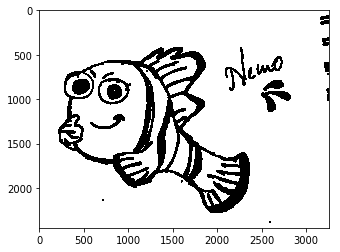

In [126]:
kernel = np.ones((5,5),np.uint8)
edited_nemo = cv2.morphologyEx(edited_nemo, cv2.MORPH_CLOSE, kernel)
edited_nemo = cv2.erode(edited_nemo,kernel,iterations = 3)
plt.imshow(edited_nemo,cmap="gray");
cv2.imwrite("Edited_Nemo.jpg",edited_nemo)

In [137]:
edited_pooh=np.zeros((len(pooh_images[0]),len(pooh_images[0][0])),dtype=np.uint8)
for i in range(0,len(pooh_images[0]),1):
    for j in range(0,len(pooh_images[0][0]),1):
        if pooh_images[0][i,j]>90:
            edited_pooh[i,j]=255.0;
edited_pooh = cv2.medianBlur(edited_pooh,5)

True

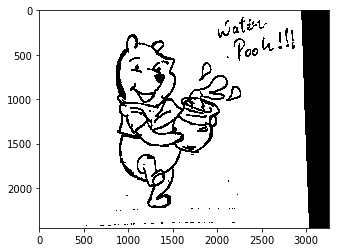

In [138]:
edited_pooh = cv2.morphologyEx(edited_pooh, cv2.MORPH_CLOSE, kernel)
edited_pooh = cv2.erode(edited_pooh,kernel,iterations = 2)
plt.imshow(edited_pooh,cmap="gray");
cv2.imwrite("Edited_Pooh.jpg",edited_pooh)

In [174]:
def generate_score(img1,img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    good = []
    for m in matches:
        if m[0].distance < 0.5*m[1].distance:
            good.append(m)
    matches = np.asarray(good)
    return len(matches)/(len(kp2)*0.2)

In [175]:
print("Score for Nemo: ",generate_score(edited_nemo,nemo_images[1]));
print("Score for Pooh: ",generate_score(edited_pooh,pooh_images[1]));

('Score for Nemo: ', 0.03361858190709046)
('Score for Pooh: ', 0.05397448478900883)


In [176]:
print("Score for Nemo: ",generate_score(nemo_images[0],nemo_images[1]));
print("Score for Pooh: ",generate_score(pooh_images[0],pooh_images[1]));

('Score for Nemo: ', 0.06418092909535451)
('Score for Pooh: ', 0.2158979391560353)


In [177]:
p=cv2.imread("p.png",0);
print("Score for Pooh: ",generate_score(pooh_images[1],pooh_images[1]));

('Score for Pooh: ', 5.0)
